In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database.

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [10]:
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df= pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'],inplace=True)
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

In [12]:
# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

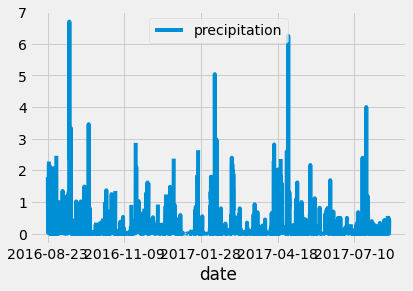

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Choose the station with the highest number of temperature observations.
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [19]:
# Query the last 12 months of temperature observation data for this station
tobs_df = pd.DataFrame(results, columns=['tobs'])
print(tobs_df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


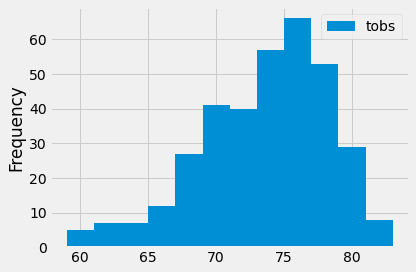

In [20]:
#plot the results as a histogram
tobs_df.plot.hist(bins=12)
plt.tight_layout()

In [21]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [22]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [58]:
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs, Measurement.station).all()
print(results)

[('2010-01-01', 0.08, 65.0, 'USC00519397'), ('2010-01-02', 0.0, 63.0, 'USC00519397'), ('2010-01-03', 0.0, 74.0, 'USC00519397'), ('2010-01-04', 0.0, 76.0, 'USC00519397'), ('2010-01-06', None, 73.0, 'USC00519397'), ('2010-01-07', 0.06, 70.0, 'USC00519397'), ('2010-01-08', 0.0, 64.0, 'USC00519397'), ('2010-01-09', 0.0, 68.0, 'USC00519397'), ('2010-01-10', 0.0, 73.0, 'USC00519397'), ('2010-01-11', 0.01, 64.0, 'USC00519397'), ('2010-01-12', 0.0, 61.0, 'USC00519397'), ('2010-01-14', 0.0, 66.0, 'USC00519397'), ('2010-01-15', 0.0, 65.0, 'USC00519397'), ('2010-01-16', 0.0, 68.0, 'USC00519397'), ('2010-01-17', 0.0, 64.0, 'USC00519397'), ('2010-01-18', 0.0, 72.0, 'USC00519397'), ('2010-01-19', 0.0, 66.0, 'USC00519397'), ('2010-01-20', 0.0, 66.0, 'USC00519397'), ('2010-01-21', 0.0, 69.0, 'USC00519397'), ('2010-01-22', 0.0, 67.0, 'USC00519397'), ('2010-01-23', 0.0, 67.0, 'USC00519397'), ('2010-01-24', 0.01, 71.0, 'USC00519397'), ('2010-01-25', 0.0, 67.0, 'USC00519397'), ('2010-01-26', 0.04, 76.0, '

In [59]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df= pd.DataFrame(results, columns=['date','precipitation','tobs', 'station'])
df.set_index(df['date'],inplace=True)
print(df.to_string(index=False))

       date  precipitation  tobs      station
 2010-01-01           0.08  65.0  USC00519397
 2010-01-02           0.00  63.0  USC00519397
 2010-01-03           0.00  74.0  USC00519397
 2010-01-04           0.00  76.0  USC00519397
 2010-01-06            NaN  73.0  USC00519397
 2010-01-07           0.06  70.0  USC00519397
 2010-01-08           0.00  64.0  USC00519397
 2010-01-09           0.00  68.0  USC00519397
 2010-01-10           0.00  73.0  USC00519397
 2010-01-11           0.01  64.0  USC00519397
 2010-01-12           0.00  61.0  USC00519397
 2010-01-14           0.00  66.0  USC00519397
 2010-01-15           0.00  65.0  USC00519397
 2010-01-16           0.00  68.0  USC00519397
 2010-01-17           0.00  64.0  USC00519397
 2010-01-18           0.00  72.0  USC00519397
 2010-01-19           0.00  66.0  USC00519397
 2010-01-20           0.00  66.0  USC00519397
 2010-01-21           0.00  69.0  USC00519397
 2010-01-22           0.00  67.0  USC00519397
 2010-01-23           0.00  67.0  

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19550 entries, 2010-01-01 to 2017-08-23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19550 non-null  object 
 1   precipitation  18103 non-null  float64
 2   tobs           19550 non-null  float64
 3   station        19550 non-null  object 
dtypes: float64(2), object(2)
memory usage: 763.7+ KB


In [62]:
df.index = pd.to_datetime(df.index)

In [63]:
june_df=df.loc[df.index.month == 6]
june_df

,date,precipitation,tobs,station
date,,,,
2010-06-01,2010-06-01,0.00,78.0,USC00519397
2010-06-02,2010-06-02,0.01,76.0,USC00519397
2010-06-03,2010-06-03,0.00,78.0,USC00519397
2010-06-04,2010-06-04,0.00,76.0,USC00519397
2010-06-05,2010-06-05,0.00,77.0,USC00519397
...,...,...,...,...
2017-06-26,2017-06-26,0.02,79.0,USC00516128
2017-06-27,2017-06-27,0.10,74.0,USC00516128
2017-06-28,2017-06-28,0.02,74.0,USC00516128


In [64]:
june_df.describe()

,precipitation,tobs
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [65]:
december_df=df.loc[df.index.month == 12]
december_df

,date,precipitation,tobs,station
date,,,,
2010-12-01,2010-12-01,0.04,76.0,USC00519397
2010-12-03,2010-12-03,0.00,74.0,USC00519397
2010-12-04,2010-12-04,0.00,74.0,USC00519397
2010-12-06,2010-12-06,0.00,64.0,USC00519397
2010-12-07,2010-12-07,0.00,64.0,USC00519397
...,...,...,...,...
2016-12-27,2016-12-27,0.14,71.0,USC00516128
2016-12-28,2016-12-28,0.14,71.0,USC00516128
2016-12-29,2016-12-29,1.03,69.0,USC00516128


In [66]:
december_df.describe()

,precipitation,tobs
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000
